In [1]:
import sys
#!{sys.executable} -m pip install neuralprophet[live]

In [2]:
sys.path.append("./../")

In [3]:
from src.algorithms.neural_prophet.neuralprophet import NeuralProphet_MODEL
import pandas as pd
from neuralprophet import NeuralProphet

In [4]:
from datetime import datetime 

today = datetime.strftime(datetime.today(),"%Y-%m-%d")
import yfinance as yf
# Request historical data for past 5 years
df = yf.download("^GSPC", start='2019-01-01', end=today)
df.columns = [i.replace(" ", "_") for i in list(df)]
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3442870000
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000


In [5]:
train_df = df.loc[:"2021-07-31"]
test_df = df.loc["2021-08-01":]

In [6]:
prices_df = pd.DataFrame(columns = ["ds", "y"])
prices_df["ds"] = df.index
prices_df["y"] = df["Adj_Close"].values

prices_train_df = pd.DataFrame(columns = ["ds", "y"])
prices_train_df["ds"] = train_df.index
prices_train_df["y"] = train_df["Adj_Close"].values
prices_test_df = pd.DataFrame(columns = ["ds", "y"])
prices_test_df["ds"] = test_df.index
prices_test_df["y"] = test_df["Adj_Close"].values

In [20]:

changepoints = ['2020-03-16', '2020-04-01', '2020-04-21', '2020-07-21', '2020-08-06', '2020-08-26', '2020-09-11', '2020-11-09', '2020-11-26', '2020-12-14', '2021-03-19', '2021-04-06']
changepoints.extend(["2021-07-12"])

kwargs = dict(trend_reg=0.5,
                      num_hidden_layers=5,
                      n_lags= 10,
                      changepoints=changepoints,
                    #   changepoints_range=0.4,
                    #   n_changepoints=50,
                      # seasonality_reg = 0.2,
                      yearly_seasonality="auto",
                      weekly_seasonality="auto",
                      daily_seasonality="auto",
                      n_forecasts=1,
                      normalize="auto",
                      batch_size =100)
NPM = NeuralProphet_MODEL(
  neuralprophet_kwargs=kwargs
)

NPM.fit(prices_train_df, fit_kwargs=dict(freq='D'))

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.16% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 292 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 292 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 130
WARNING - (py.warnings._showwarnmsg) - /opt/conda/envs/ts/lib/python3.8/site-packages/neuralprophet/utils.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

  0%|          | 0/248 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-02, min: 7.70E-01


  0%|          | 0/248 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.09E-02, min: 1.64E+00


  0%|          | 0/248 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.26E-02, min: 9.91E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.70E-02
Epoch[130/130]: 100%|██████████| 130/130 [00:05<00:00, 25.21it/s, SmoothL1Loss=0.000126, MAE=22.8, RMSE=31.4, RegLoss=0.00156] 


In [21]:
NPM.test(prices_train_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.16% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 292 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 292 NaN values in column y were auto-imputed.
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.000 22.822 31.618


,SmoothL1Loss,MAE,RMSE
0,0.000126,22.821817,31.618103


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.16% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /opt/conda/envs/ts/lib/python3.8/site-packages/neuralprophet/forecaster.py:1703: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 90.476% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 9 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 9 NaN values in column y were auto-imputed.
WARNING 

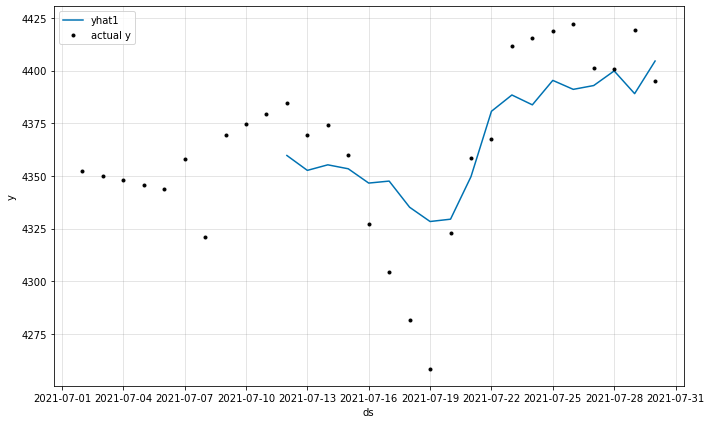

In [22]:
NPM.plot_prediction(prices_train_df, periods=0, n_historic_predictions=10)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 148 historic forecasts, reduced to 138.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /opt/conda/envs/ts/lib/python3.8/site-packages/neuralprophet/forecaster.py:1703: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.973% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 65 mis

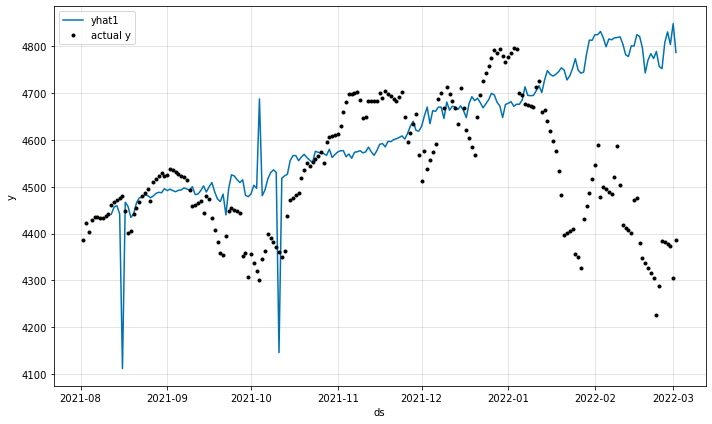

In [24]:
future = NPM.model.make_future_dataframe(prices_test_df, periods=0,n_historic_predictions=len(prices_test_df))

forecast = NPM.model.predict(future)
forecasts_plot = NPM.model.plot(forecast)
#forecasts_plot = model.plot(forecast)

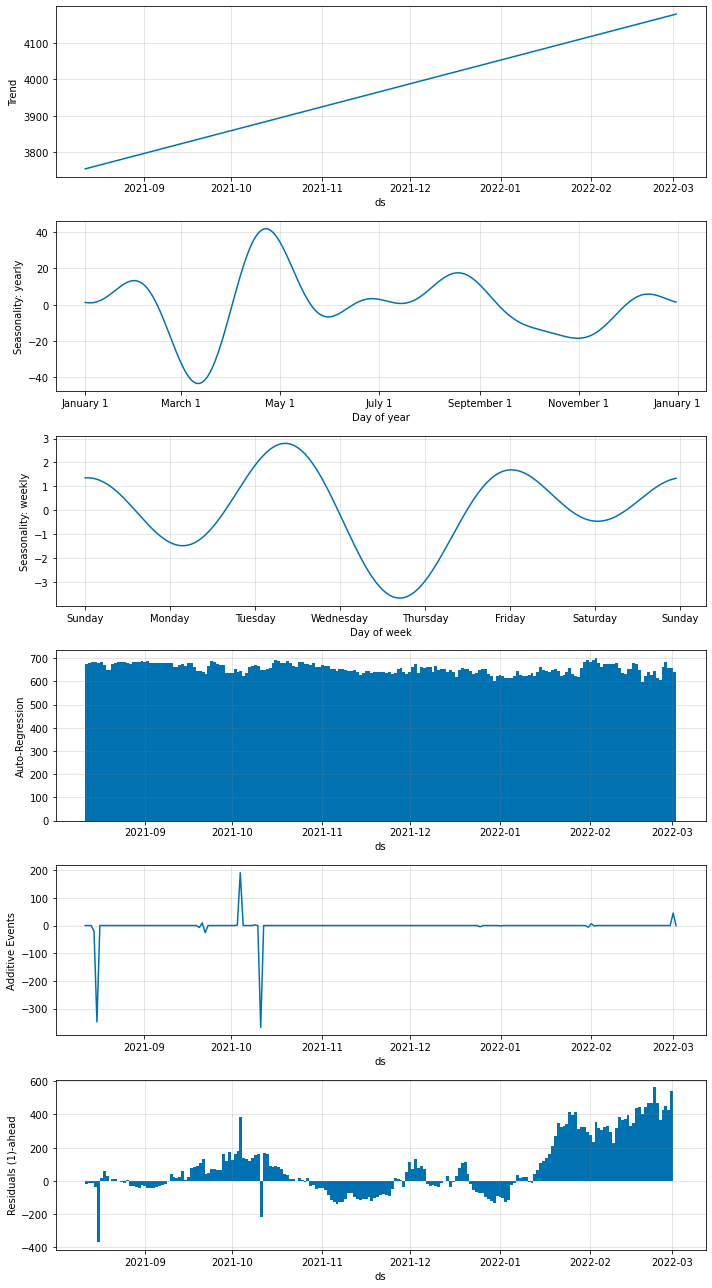

In [26]:
fig2 = NPM.model.plot_components(forecast,residuals=True)

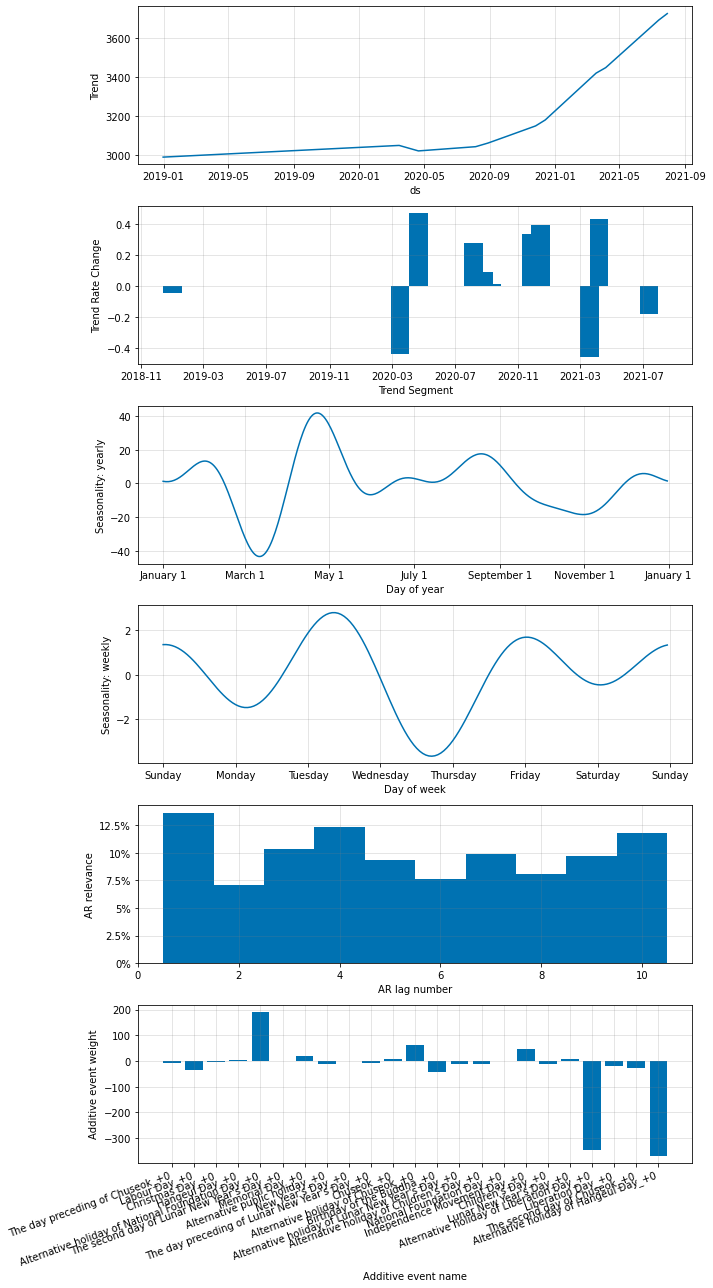

In [27]:
fig_param = NPM.plot_parameters(  )

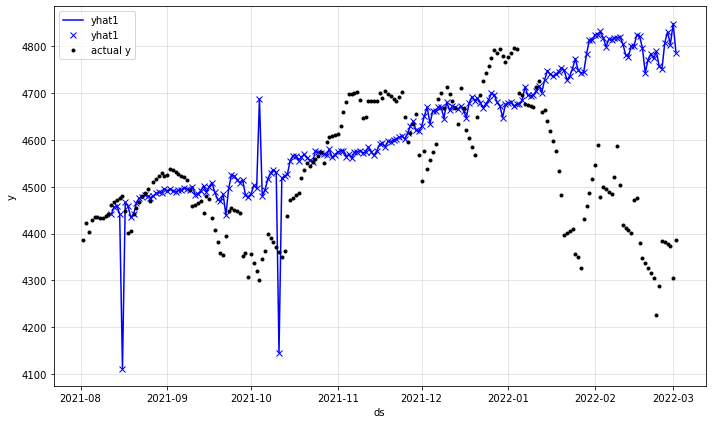

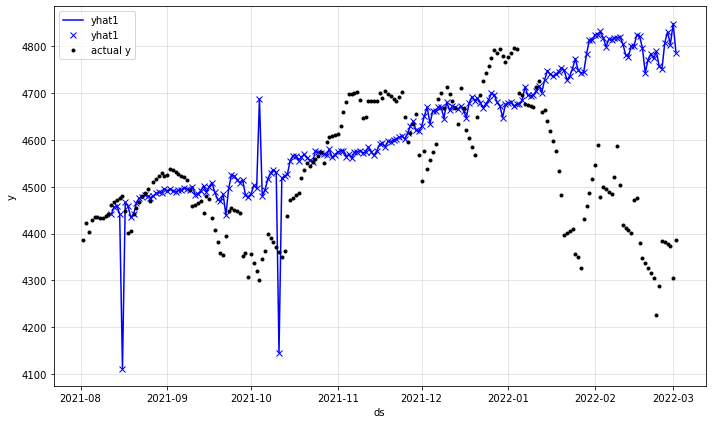

In [28]:
NPM.model.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)